In [2]:
import sys
import os.path as op
    
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import pickle

module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from data_analysis.functions_preprocessing import split_raws

from data_analysis.functions_behavioral import \
    (create_event_df, remove_ghost_triggers, calculate_alpha,
     join_event_dfs, remove_outliers, events_from_event_df)

# Create path to the folder "behavioral"
behav_dir = "/net/store/nbp/projects/hyperscanning/study_project/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"

subject_dir = '/net/store/nbp/projects/hyperscanning/hyperscanning-2.0/mne_data/sourcedata/'

"""
pair = 202
participant = 0

# 1.2 define the subjects id and its path
subj_id = "sub-{0}_p-{1}".format(pair, participant)
subs_path = subject_dir + "sub-{0}/eeg/sub-{0}_task-hyper_eeg.fif".format(pair)
behav_path = op.join(behav_dir, str(pair) + ".csv")

# load the data
combined_raw = mne.io.read_raw_fif(subs_path, preload=True)
"""

Matplotlib is building the font cache; this may take a moment.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' 

'\npair = 202\nparticipant = 0\n\n# 1.2 define the subjects id and its path\nsubj_id = "sub-{0}_p-{1}".format(pair, participant)\nsubs_path = subject_dir + "sub-{0}/eeg/sub-{0}_task-hyper_eeg.fif".format(pair)\nbehav_path = op.join(behav_dir, str(pair) + ".csv")\n\n# load the data\ncombined_raw = mne.io.read_raw_fif(subs_path, preload=True)\n'

In [3]:
all_subs = pd.DataFrame()

bad_list = []
for subs in ['202','203','204','205','206','207','208','209','211','212']:
    behav_path = op.join(behav_dir, "{}.csv".format(subs))#test
    
    # calculate the alpha on all trials
    df = calculate_alpha(pd.read_csv(behav_path))
    
    # our filtering condition: take vp 1 for odd trials and vp 2 for even trials
    df = df[df["trial"]%2 != df["subject"] - 1]
    
    bad_trls = len(df[df["alpha"] > 360]["trial"].unique())
    per_a = bad_trls / df["trial"].max() * 100
    print("Pair {0} - Percent of incorrect trials: {1}%".format(subs, per_a))
    
    bad_list.append(per_a)
    all_subs = all_subs.append(df)
    

all_subs["unique_trials"] = all_subs["pair"].astype(str) + "-" + all_subs["trial"].astype(str)
bad_trls = len(all_subs[all_subs["alpha"] > 360]["unique_trials"].unique())
per_a = bad_trls / len(all_subs["unique_trials"].unique()) * 100
print("All subs - Percent of incorrect trials: {0}%".format(per_a))
# reset index
print("Standard deviation over subjects: {0}%".format(np.std(bad_list)))
all_subs.index = range(len(all_subs))
#print(all_subs["unique_trials"])

Pair 202 - Percent of incorrect trials: 6.0%
Pair 203 - Percent of incorrect trials: 9.333333333333334%
Pair 204 - Percent of incorrect trials: 11.333333333333332%
Pair 205 - Percent of incorrect trials: 3.3333333333333335%
Pair 206 - Percent of incorrect trials: 10.666666666666668%
Pair 207 - Percent of incorrect trials: 9.666666666666666%
Pair 208 - Percent of incorrect trials: 18.666666666666668%
Pair 209 - Percent of incorrect trials: 8.666666666666668%
Pair 211 - Percent of incorrect trials: 25.0%
Pair 212 - Percent of incorrect trials: 31.333333333333336%
All subs - Percent of incorrect trials: 13.4%
Standard deviation over subjects: 8.394177876494055%


In [4]:
len(all_subs)

27000

In [5]:
# get all taps where one person tapped twice before the other person did
all_subs[all_subs["alpha"] > 360]

,pair,condition,block,trial,subject,tapnr,ttap,jitter,player_start_first,diff_inter,diff_intra,alpha,alpha_lin,unique_trials
76,202,blind,1,9,1,5,7.236328,0.075,1,-0.829144,0.810793,368.148058,8.148058,202-9
78,202,blind,1,9,1,7,8.932238,0.075,1,-0.872157,0.857896,365.984364,5.984364,202-9
79,202,blind,1,9,1,8,9.790134,0.075,1,-0.899273,0.809975,399.689234,39.689234,202-9
91,202,blind,1,11,1,2,4.665786,0.100,2,-1.208054,0.994704,437.214950,77.214950,202-11
171,202,blind,1,20,2,1,4.929792,0.050,1,1.256341,0.822949,549.587713,170.412287,202-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,212,blind,12,278,2,7,6.272013,0.050,2,0.735059,0.360615,733.805408,13.805408,212-278
26800,212,blind,12,278,2,8,6.632628,0.050,2,0.741067,0.367277,726.384307,6.384307,212-278
26856,212,blind,12,285,1,1,4.217153,0.100,2,0.799759,0.414336,694.878836,25.121164,212-285
26910,212,blind,12,291,1,1,3.904741,0.100,2,0.623695,0.394126,569.691413,150.308587,212-291


In [6]:
# get all the trials that were affected by these double taps
len(all_subs[all_subs["alpha"] > 360]["trial"].unique())

231

# Behavioral Plots

In [7]:
# import statsmodels.api as sm
from scipy import stats
from data_analysis.functions_behavioral import \
    (create_event_df, remove_ghost_triggers, calculate_alpha,
     join_event_dfs, remove_outliers, events_from_event_df)

# set basic parameters:
bin_size = int(np.ceil(np.sqrt(len(all_subs[all_subs["alpha"] <= 360]["alpha_lin"]))))




# set path to save plots

behav_plots = "/net/store/nbp/projects/hyperscanning/study_project/til/behavioral_plots/"


In [7]:
bin_size

151

## 1 - Boxplot of incorrect trial distribution

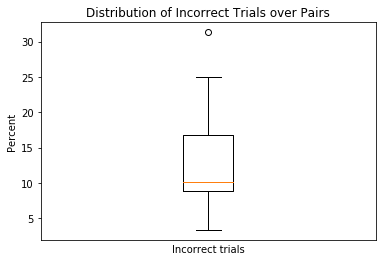

In [8]:
# Boxplot of incorrect trial distribution
# display(np.median(bad_list))
plt.boxplot(bad_list)
plt.ylabel('Percent')
plt.xlabel('Incorrect trials')
plt.title('Distribution of Incorrect Trials over Pairs')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


# create and save fig object
bad_trials = plt.gcf()

pickle.dump(bad_trials, open(behav_plots + "bad_trials.p", "wb"))

## 2 - Distribution of all valid alphas

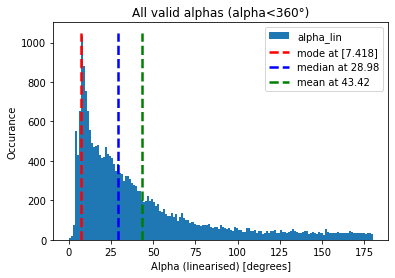

In [9]:
# set binsize to sqrt of all valid alpha
bin_size = int(np.ceil(np.sqrt(len(all_subs[all_subs["alpha"] <= 360]["alpha_lin"]))))

# get the distribution of valid alphas

all_subs[all_subs["alpha"] <= 360]["alpha_lin"].plot.hist(bins=bin_size)
plt.xlabel('Alpha (linearised) [degrees]')
plt.ylabel('Occurance')
plt.title('All valid alphas (alpha<360°)')
# create fig object
alpha_all = plt.gcf()
# save fig object
#pickle.dump(alpha_all, open(behav_plots + "alpha_all.p", 'wb'))



mean = np.around(np.mean(all_subs[all_subs["alpha"] <= 360]["alpha_lin"]),decimals=2)
median = np.around(np.median(all_subs[all_subs["alpha"] <= 360]["alpha_lin"]),decimals=2)
mode,xyz3 = stats.mode(np.around(all_subs[all_subs["alpha"] <= 360]["alpha_lin"], decimals=3))


names = ["mode", "median", "mean"]
colors = ['red', 'blue', 'green']
measurements = [mode, median, mean]


for measurement, name, color in zip(measurements, names, colors):
    plt.vlines(x=measurement,ymin=0,ymax=1050, linestyle='--', linewidth=2.5, 
                label='{0} at {1}'.format(name, measurement), colors=color)
plt.legend();

In [96]:
# get mean,median,std, skewness and IQR for distribution of all valid alphas
all_stats = np.around(all_subs[all_subs["alpha"] <= 360]["alpha_lin"].agg(['mean','median','std','skew']),decimals=2) 

q75, q25 = np.percentile(all_subs[all_subs["alpha"] <= 360]["alpha_lin"], [75 ,25])
iqr_all = np.around(q75 - q25,decimals=2)

print("descriptive statistics:\n {0}\nInterquartile range: {1}".format(all_stats,iqr_all))

descriptive statistics:
 mean      43.42
median    28.98
std       41.14
skew       1.52
Name: alpha_lin, dtype: float64
Interquartile range: 43.39


In [92]:
all_stats = np.around(all_subs[all_subs["alpha"] <= 360]["alpha_lin"].agg(['mean','median','std','skew']),decimals=2) 

mean      43.42
median    28.98
std       41.14
skew       1.52
Name: alpha_lin, dtype: float64

## 3 - Distribution of all valid alphas per tapnr

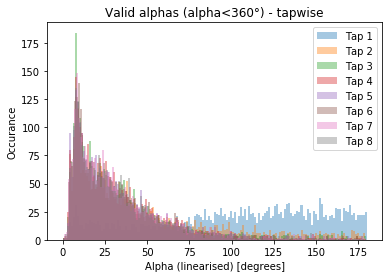

In [12]:
small_subs = all_subs[all_subs["alpha"] <= 360]

small_subs.groupby("tapnr")["alpha_lin"].plot.hist(bins=bin_size, alpha=0.4)
plt.legend(['Tap 1','Tap 2','Tap 3','Tap 4','Tap 5','Tap 6','Tap 7','Tap 8'])
plt.xlabel('Alpha (linearised) [degrees]')
plt.ylabel("Occurance")
plt.title('Valid alphas (alpha<360°) - tapwise')

# create fig object
alpha_tapwise = plt.gcf()
# save fig object
#pickle.dump(alpha_tapwise, open(behav_plots + "alpha_tapwise.p", 'wb'))

## 4 - Taps in first 1.5 seconds vs. last 1.5 seconds

In [13]:
# save time of first and last tap per trial in dataframe
first_tap = all_subs.index - all_subs.index[all_subs.index%9]
all_subs["first_tap"] = all_subs["ttap"][first_tap].to_numpy()
last_tap = all_subs.index - all_subs.index[(all_subs.index%9)] +8
all_subs["last_tap"] = all_subs["ttap"][last_tap].to_numpy()




6368

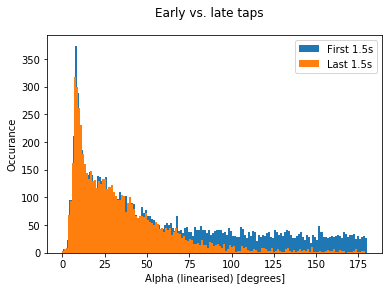

In [14]:
# only use alpha values of correct trials
all_subs = all_subs[all_subs["alpha"] <= 360]

# Plot those alpha values that occur within the range of first tap + 1.5s and last tap - 1.5s (of each trial)
all_subs[all_subs["ttap"] <= all_subs.first_tap+1.5 ]["alpha_lin"].plot.hist(bins=bin_size)
all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"].plot.hist(bins=bin_size)
plt.suptitle('Early vs. late taps')
plt.legend(['First 1.5s','Last 1.5s'])
plt.xlabel('Alpha (linearised) [degrees]')
plt.ylabel('Occurance')

# create fig object
early_vs_late_taps = plt.gcf()
# save fig object
#pickle.dump(early_vs_late_taps, open(behav_plots + "early_vs_late.p", 'wb'))

len(all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"])

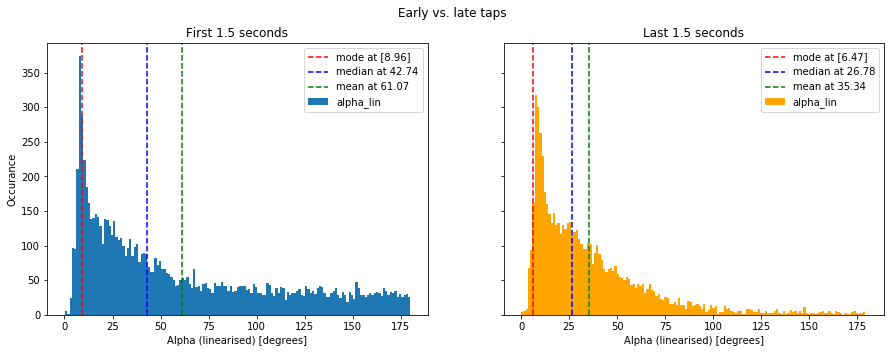

In [15]:
# only use alpha values of correct trials
all_subs = all_subs[all_subs["alpha"] <= 360]

# Plot those alpha values that occur within the range of first tap + 1.5s and last tap - 1.5s (of each trial)
first = all_subs[all_subs["ttap"] <= all_subs.first_tap+1.5 ]
first_mean = np.around(np.mean(first["alpha_lin"]),decimals=2)
first_median = np.around(np.median(first["alpha_lin"]),decimals=2)
first_mode,xyz = stats.mode(np.around(first["alpha_lin"], decimals=2))
#first_mode = max(first["alpha_lin"], key = first["alpha_lin"].count)


last = all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]
last_mean = np.around(np.mean(last["alpha_lin"]),decimals=2)
last_median = np.around(np.median(last["alpha_lin"]),decimals=2)
last_mode,xyz2 = stats.mode(np.around(last["alpha_lin"], decimals=2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True, sharex=True)
plt.suptitle('Early vs. late taps')
#first["alpha_lin"].plot.hist(bins=bin_size, ax = axes[0], logx=True)
#last["alpha_lin"].plot.hist(bins=bin_size, ax = axes[1], color='orange', logx=True)
first["alpha_lin"].plot.hist(bins=bin_size, ax = axes[0])
last["alpha_lin"].plot.hist(bins=bin_size, ax = axes[1], color='orange')

axes[0].set_xlabel('Alpha (linearised) [degrees]')
axes[0].set_ylabel("Occurance")
axes[0].set_title("First 1.5 seconds")
axes[1].set_xlabel('Alpha (linearised) [degrees]')
axes[1].set_title("Last 1.5 seconds")

names = ["mode", "median", "mean"]
colors = ['red', 'blue', 'green']
first_measurement = [first_mode, first_median, first_mean]
last_measurement = [last_mode, last_median, last_mean]


#axes[0].axvline(x=first_median, linestyle='--', linewidth=2.5, label='median', c='green')
#axes[0].axvline(x=first_mean, linestyle='--', linewidth=2.5, label='mean', c='blue')
#axes[0].axvline(x=first_mode, linestyle='--', linewidth=2.5, label='mode', c='red')





for first_measurement, name, color in zip(first_measurement, names, colors):
    axes[0].axvline(x=first_measurement, linestyle='--', linewidth=1.5, 
                label='{0} at {1}'.format(name, first_measurement), c=color)
axes[0].legend();

for last_measurement, name, color in zip(last_measurement, names, colors):
    axes[1].axvline(x=last_measurement, linestyle='--', linewidth=1.5, 
                label='{0} at {1}'.format(name, last_measurement), c=color)
axes[1].legend();


# create fig object
#early_vs_late_taps = plt.gcf()
# save fig object
#pickle.dump(early_vs_late_taps, open(behav_plots + "early_vs_late.p", 'wb'))

#len(all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"])

In [37]:
first

,pair,condition,block,trial,subject,tapnr,ttap,jitter,player_start_first,diff_inter,diff_intra,alpha,alpha_lin,unique_trials,first_tap,last_tap
0,202,blind,1,1,1,1,3.216545,0.025,1,-0.246290,0.895074,99.058151,99.058151,202-1,3.216545,9.578815
1,202,blind,1,1,1,2,4.111619,0.025,1,-0.045056,0.802895,20.202038,20.202038,202-1,3.216545,9.578815
9,202,blind,1,2,2,1,3.258547,0.025,1,-0.056928,0.814969,25.147029,25.147029,202-2,3.258547,9.812606
10,202,blind,1,2,2,2,4.073516,0.025,1,-0.015915,0.776940,7.374277,7.374277,202-2,3.258547,9.812606
18,202,blind,1,3,1,1,4.235035,0.050,2,-0.277973,0.912064,109.718451,109.718451,202-3,4.235035,11.115654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,212,blind,12,299,1,2,4.197148,0.075,1,0.012049,0.378565,11.458071,11.458071,212-299,3.725705,6.689930
26984,212,blind,12,299,1,3,4.575713,0.075,1,0.052927,0.340635,55.935893,55.935893,212-299,3.725705,6.689930
26985,212,blind,12,299,1,4,4.916348,0.075,1,0.038933,0.364874,38.412982,38.412982,212-299,3.725705,6.689930
26991,212,blind,12,300,2,1,3.940550,0.100,2,-0.860052,1.334387,232.030673,127.969327,212-300,3.940550,7.702976


In [84]:
first_stats = np.around(first.groupby(["pair","subject"])["alpha_lin"].agg(['mean','median','std','skew']),decimals=2)
first_stats

mean  median    std  skew
pair subject                            
202  1        61.56   50.98  46.59  0.55
     2        69.48   66.99  51.66  0.43
203  1        59.86   39.99  51.81  0.90
     2        51.79   31.12  49.50  1.21
204  1        50.47   33.37  45.73  1.22
     2        54.34   33.49  48.80  0.99
205  1        52.11   33.85  47.62  1.10
     2        54.56   32.24  53.08  1.10
206  1        57.64   38.27  51.08  0.91
     2        57.90   35.65  52.23  0.98
207  1        64.49   50.78  48.20  0.73
     2        64.10   46.54  50.48  0.77
208  1        77.64   72.16  52.93  0.34
     2        81.76   74.25  56.64  0.22
209  1        57.01   43.35  46.63  0.76
     2        58.06   42.87  48.60  0.82
211  1        49.85   30.10  46.35  1.02
     2        52.30   37.04  45.28  0.83
212  1        62.28   50.82  45.63  0.75
     2        77.08   66.53  54.39  0.34

In [88]:
np.around(first["alpha_lin"].agg(['mean','median','std','skew']),decimals=2)

mean      61.07
median    42.74
std       50.74
skew       0.79
Name: alpha_lin, dtype: float64

In [87]:
last_stats = np.around(last.groupby(["pair","subject"])["alpha_lin"].agg(['mean','median','std','skew']),decimals=2)
last_stats

mean  median    std  skew
pair subject                            
202  1        23.67   16.86  25.99  3.11
     2        21.73   17.00  16.83  1.54
203  1        25.64   21.22  19.77  2.05
     2        23.91   17.74  19.89  2.36
204  1        31.97   28.47  21.59  0.98
     2        32.60   26.78  22.71  0.88
205  1        27.38   22.13  19.53  1.45
     2        27.58   22.02  20.49  1.42
206  1        32.45   25.37  26.02  1.65
     2        34.19   28.08  27.36  2.05
207  1        48.67   37.98  38.87  1.33
     2        45.86   35.17  36.08  1.38
208  1        56.22   49.72  38.89  1.09
     2        55.42   47.92  38.20  1.00
209  1        22.43   18.72  15.63  1.12
     2        25.22   19.47  22.47  2.70
211  1        22.27   17.90  17.40  1.50
     2        22.42   19.48  16.13  1.88
212  1        43.96   34.37  35.14  1.36
     2        41.56   31.54  34.12  1.63

In [89]:
np.around(last["alpha_lin"].agg(['mean','median','std','skew']),decimals=2)

mean      35.34
median    26.78
std       30.22
skew       1.83
Name: alpha_lin, dtype: float64

In [83]:
first_stats-last_stats

mean  median    std
pair subject                      
202  1        37.89   34.12  20.60
     2        47.75   49.99  34.83
203  1        34.22   18.77  32.04
     2        27.88   13.38  29.61
204  1        18.50    4.90  24.14
     2        21.74    6.71  26.09
205  1        24.73   11.72  28.09
     2        26.98   10.22  32.59
206  1        25.19   12.90  25.06
     2        23.71    7.57  24.87
207  1        15.82   12.80   9.33
     2        18.24   11.37  14.40
208  1        21.42   22.44  14.04
     2        26.34   26.33  18.44
209  1        34.58   24.63  31.00
     2        32.84   23.40  26.13
211  1        27.58   12.20  28.95
     2        29.88   17.56  29.15
212  1        18.32   16.45  10.49
     2        35.52   34.99  20.27

### 4.2 early vs. late - pairwise

### 4.3 - Statistics

In [45]:
all_subs = all_subs[all_subs["alpha"] <= 360]

first_taps = all_subs[all_subs["ttap"] <= all_subs.first_tap+1.5 ]["alpha_lin"]
last_taps = all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"]

#ks, p = kstest(first_taps, "norm")

alpha_level = 0.05
shap_f, p_f = stats.shapiro(first_taps)
shap_l, p_l = stats.shapiro(last_taps)


if p_f < alpha_level:
    print("Alpha values of first taps are not normal distributed")
else:
    print("Alpha values of first taps are normal distributed")
    
if p_l < alpha_level:
    print("Alpha values of last taps are not normal distributed")
else:
    print("Alpha values of last taps are normal distributed")
    
# Test for difference between first and last taps
# mws, p = stats.mannwhitneyu(first_taps,last_taps, alternative='two-sided')
# mws,p
# use wilcoxon test instead:
first_taps_short = np.random.choice(first_taps,len(last_taps))
wcs,pw = stats.wilcoxon(first_taps_short,last_taps,alternative='two-sided')
pw

if p < alpha_level:
    print(p,"reject H0")
else:
    print(p,"H0 not rejectable")
    


Alpha values of first taps are not normal distributed
Alpha values of last taps are not normal distributed
2.1076390329861428e-178 reject H0


In [37]:
p_f

0.0

1.7156797009321036e-207

In [23]:
print(len(first_taps),len(last_taps))

8890 6368


### 4.2 - Boxplot early vs. late

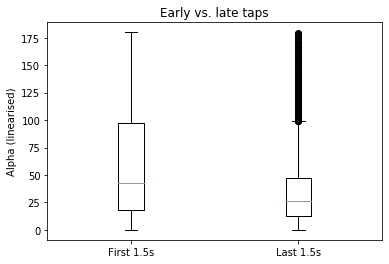

In [29]:
plt.boxplot([all_subs[all_subs["ttap"] <= all_subs.first_tap+1.5 ]["alpha_lin"],
             all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"]])

#display(np.median(all_subs[all_subs["ttap"] <= all_subs.first_tap+1.5 ]["alpha_lin"]))
#display(np.median(all_subs[all_subs["ttap"] >= all_subs.last_tap-1.5 ]["alpha_lin"]))
plt.title("Early vs. late taps")
plt.ylabel("Alpha (linearised) [degree]")
plt.xticks(ticks=np.arange(1,3),labels=["First 1.5s","Last 1.5s"])

# create fig object
boxplot_early_vs_late = plt.gcf()
# save fig object
#pickle.dump(boxplot_early_vs_late, open(behav_plots + "boxplot_early_vs_late.p", 'wb'))

## 5 - Alpha over Blocks

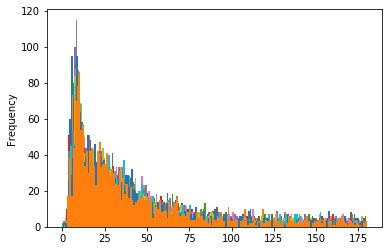

In [30]:
all_subs = all_subs[all_subs["alpha"] <= 360]

alpha_block = all_subs.groupby("block")
alpha_block["alpha_lin"].plot.hist(bins=bin_size)

# create fig object
alpha_blocks = plt.gcf()
# save fig object
#pickle.dump(alpha_blocks, open(behav_plots + "alpha_blocks.p", 'wb'))

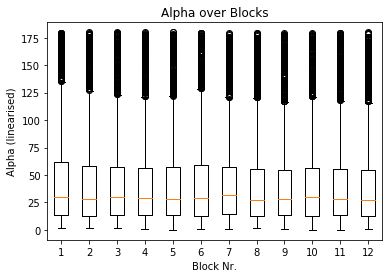

In [31]:
plt.boxplot([all_subs[all_subs["block"]==1]["alpha_lin"],
            all_subs[all_subs["block"]==2]["alpha_lin"],
            all_subs[all_subs["block"]==3]["alpha_lin"],
            all_subs[all_subs["block"]==4]["alpha_lin"],
            all_subs[all_subs["block"]==5]["alpha_lin"],
            all_subs[all_subs["block"]==6]["alpha_lin"],
            all_subs[all_subs["block"]==7]["alpha_lin"],
            all_subs[all_subs["block"]==8]["alpha_lin"],
            all_subs[all_subs["block"]==9]["alpha_lin"],
            all_subs[all_subs["block"]==10]["alpha_lin"],
            all_subs[all_subs["block"]==11]["alpha_lin"],
            all_subs[all_subs["block"]==12]["alpha_lin"]]
           )
plt.title("Alpha over Blocks")
plt.ylabel("Alpha (linearised)")
plt.xlabel("Block Nr.")
plt.xticks(ticks=np.arange(1,13),labels=range(1,13))


# create fig object
boxplot_blocks = plt.gcf()
# save fig object
#pickle.dump(boxplot_blocks, open(behav_plots + "boxplot_blocks.p", 'wb'))